## 목표 : 생선 품종 분류 모델
- 데이터 : fish.csv
- 피쳐: Weight, Length
- 타겟: Species
- 기계학습 : 지도학습 + 분류(도미, 빙어 분류는 이진분류)

(1) 모듈 로딩 및 데이터 준비 <hr>

In [1]:
# 데이터분석 모듈 로딩
import pandas as pd

In [2]:
# 데이터 파일 설정
data_file = '../data/fish.csv'

In [3]:
# DF로 데이터 준비
#fishDF = pd.read_csv(data_file, usecols=[0,1,2])
fishDF = pd.read_csv(data_file, usecols=['Species', 'Weight', 'Length'])

# 기본정보 확인
fishDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length   159 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.9+ KB


(2) 데이터 전처리
- 결측치, 중복데이터, 이상치

In [4]:
# 컬럼별 고유값으로 이상치 체크 => unique()
print("fishDF.Species => ", fishDF.Species.unique())
print("fishDF.Weight => ", fishDF.Weight.unique())
print("fishDF.Length => ", fishDF.Length.unique())

fishDF.Species =>  ['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']
fishDF.Weight =>  [ 242.   290.   340.   363.   430.   450.   500.   390.   475.   600.
  700.   610.   650.   575.   685.   620.   680.   725.   720.   714.
  850.  1000.   920.   955.   925.   975.   950.    40.    69.    78.
   87.   120.     0.   110.   150.   145.   160.   140.   169.   161.
  200.   180.   272.   270.   306.   540.   800.    55.    60.    90.
  170.   273.   300.     5.9   32.    51.5   70.   100.    80.    85.
  115.   125.   130.   135.   225.   188.   197.   218.   260.   265.
  250.   320.   514.   556.   840.   690.   900.   820.  1015.  1100.
  345.   456.   510.   567.   770.  1250.  1600.  1550.  1650.     6.7
    7.5    7.     9.7    9.8    8.7   10.     9.9   12.2   13.4   19.7
   19.9]
fishDF.Length =>  [25.4 26.3 26.5 29.  29.7 30.  30.7 31.  31.5 32.  33.  33.5 34.  34.5
 35.  36.  37.  38.5 39.5 41.  14.1 18.2 18.8 19.8 20.  20.5 20.8 21.
 22.  22.5 24.  23.4 23.5 25.2 

In [5]:
# 결측치 체크 => inna() / isnull()
fishDF.isna().sum()

Species    0
Weight     0
Length     0
dtype: int64

In [6]:
# 중복데이터 => duplicated()
fishDF.duplicated().sum()

4

In [7]:
# 'Bream', 'Smelt' 두 가지 품종 데이터만 추출
mask = fishDF.Species.isin(['Bream', 'Smelt'])

twoFishDF=fishDF[mask]

# 인덱스 리셋: 기존에 인덱스 삭제 후 0-base 인덱스 설정
# Scikit-learn에 저장 시 ndarray 타입으로 저장되면서 인덱스 정리
twoFishDF = twoFishDF.reset_index(drop=True)

# 기본 정보 확인
twoFishDF.info()

# 인덱스 확인
print(twoFishDF.head(3), twoFishDF.tail(3), sep='\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  49 non-null     object 
 1   Weight   49 non-null     float64
 2   Length   49 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.3+ KB
  Species  Weight  Length
0   Bream   242.0    25.4
1   Bream   290.0    26.3
2   Bream   340.0    26.5
   Species  Weight  Length
46   Smelt    12.2    13.0
47   Smelt    19.7    14.3
48   Smelt    19.9    15.0


(3) 학습용 데이터 준비 => 피쳐 + 타겟 분리

In [8]:
# 피쳐 데이터 추출
feature = twoFishDF[twoFishDF.columns[1:]]
feature.head()

,Weight,Length
0,242.0,25.4
1,290.0,26.3
2,340.0,26.5
3,363.0,29.0
4,430.0,29.0


In [9]:
# 타겟 데이터 추출
target = twoFishDF.Species

target=target.replace({'Bream':0, 'Smelt':1}).copy()

# 데이터 확인
print(target.head(3), target.tail(3), sep='\n\n')

0    0
1    0
2    0
Name: Species, dtype: int64

46    1
47    1
48    1
Name: Species, dtype: int64


(4) 학습 진행
    - 알고리즘 구현 인스턴스 생성 => 지도학습 - 분류 알고리즘 중 선택 : KNN
    - 학습 진행 메서드 => fit()

In [10]:
# 모듈 로딩
from sklearn.neighbors import KNeighborsClassifier

In [11]:
#(4-1) KNN 인스턴스 생성
model = KNeighborsClassifier()

model

KNeighborsClassifier()

In [12]:
#(4-2) 학습 진행 fit(2D, 1D)
model.fit(feature, target)

KNeighborsClassifier()

In [13]:
# 학습 후 속성 확인 => 속성명_ : 모델 파라미터 -> 모델 학습 후 생성 및 저장됨!
print("classes_ : ", model.classes_)
print("feature_names_in_ : ", model.feature_names_in_)
print("n_features_in_ : ", model.n_features_in_)

classes_ :  [0 1]
feature_names_in_ :  ['Weight' 'Length']
n_features_in_ :  2


(5) 학습 후 검사 즉 테스트 => 메서드: score()
- 결과값 : 0.0(0%) ~ 1.0(100%)
- 사용 데이터 : 학습에 사용되지 않은 데이터

In [14]:
model.score(feature, target)

1.0

(6) 예측 즉 서비스에 모델 활용 시 사용 => 메서드 : predict(), predict_proba()
- 조건 : 학습 시 전달된 데이터와 동일한 형태의 데이터 전달

In [15]:
# [무게, 길이]
new_data = pd.DataFrame([[21.8, 17]], columns = model.feature_names_in_)

# 학습 시 제공된 데이터와 동일한 형태로 제공
pred_y = model.predict(new_data)

pred_y

array([1], dtype=int64)

In [16]:
# 예측 확률
model.predict_proba(new_data)

array([[0., 1.]])

In [17]:
# 데이터와 최근접 이웃 데이터기 => kneighbors() 메서드
# 반환값 : 거리, 원소번호
dis, ind = model.kneighbors(new_data)

# ndarray => list
ind.tolist()[0]

[48, 47, 45, 46, 44]

In [18]:
# K개의 최근접 이웃 데이터만 저장
kneighDF = feature.iloc[ind.tolist()[0]]

In [19]:
feature.index, feature.shape

(RangeIndex(start=0, stop=49, step=1), (49, 2))

- [확인]Weight & Length 시각화

<Axes: xlabel='Weight', ylabel='Length'>

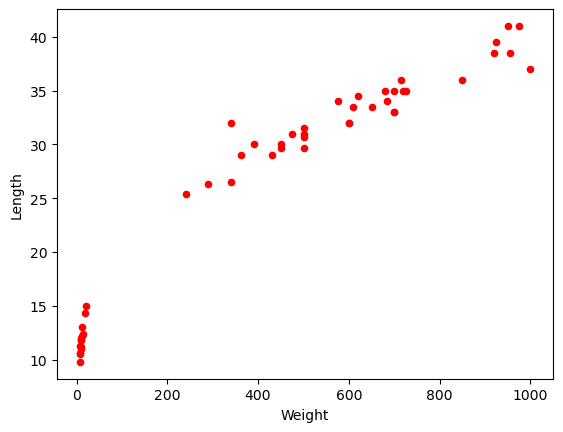

In [20]:
# pandas의 Series, DataFrame의 plot()메서드
#feature.plot(x='Weight', y='Length', kind='scatter', title='Weight & Length')
feature.plot.scatter(x='Weight', y='Length', c='red')

In [21]:
# matplotlib 활용
import matplotlib.pyplot as plt

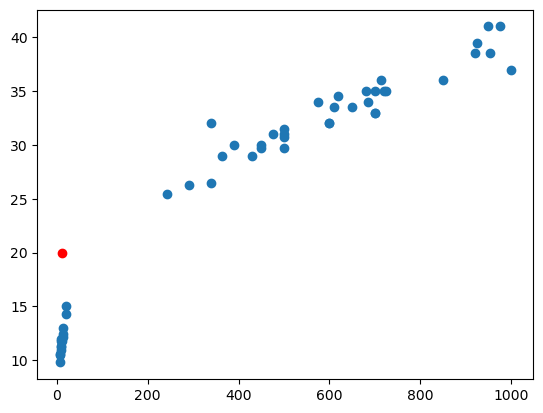

In [22]:
# 데이터 시각화
plt.scatter(x=feature.Weight, y=feature.Length)

# 새로운 데이터 시각화
new_data.Length.to_list()[0], new_data.Weight.to_list()[0]

# 새로운 데이터d의 K개 최근접 이웃 데이터 시각화
plt.plot(10, 20, 'ro')
plt.show()

In [23]:
x, y = model.kneighbors(new_data)

In [24]:
x, y

(array([[ 2.75862284,  3.42052628,  9.57705592, 10.4       , 10.73312629]]),
 array([[48, 47, 45, 46, 44]], dtype=int64))

In [25]:
feature

,Weight,Length
0,242.0,25.4
1,290.0,26.3
2,340.0,26.5
3,363.0,29.0
4,430.0,29.0
5,450.0,29.7
6,500.0,29.7
7,390.0,30.0
8,450.0,30.0
9,500.0,30.7


In [26]:
feature.loc[y[0]]

,Weight,Length
48,19.9,15.0
47,19.7,14.3
45,13.4,12.4
46,12.2,13.0
44,12.2,12.2


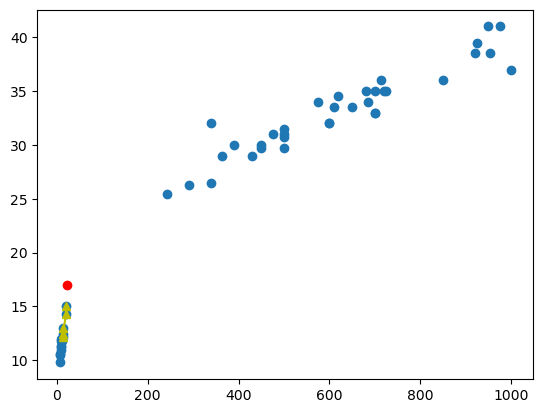

In [27]:
# 데이터 시각화
plt.scatter(x=feature.Weight, y=feature.Length)

# 새로운 데이터 시각화
plt.plot(new_data.Weight[0], new_data.Length[0], 'ro')

# 새로운 데이터의 K개 최근접 이웃 데이터 시각화
plt.plot(kneighDF.Weight, kneighDF.Length, 'y^-')

plt.show()